In [2]:
!pip install scikit-learn


'pip' is not recognized as an internal or external command,
operable program or batch file.


# `Business Understanding`

Train a machine learning model to predict the `product category` based on the other features.

# `Data Understanding`

## Importation of all necessary packages

In [ ]:
#Import Necessary Packages:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


## Read Data

In [3]:
# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('dollar_tree-231012-200322.csv')

# Display the first few rows of the dataset
df.head()


,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2/19/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2/20/2016,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2/27/2016,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,3/12/2016,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


## Perform a `brief` EDA  (info(), describe(), corr() etc)

In [4]:
# Check the shape of the dataset
print("Dataset shape:", df.shape)

# Display basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Dataset shape: (34867, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             34867 non-null  int64  
 1   Date              34866 non-null  object 
 2   Year              34866 non-null  float64
 3   Month             34866 non-null  object 
 4   Customer Age      34866 non-null  float64
 5   Customer Gender   34866 non-null  object 
 6   Country           34866 non-null  object 
 7   State             34866 non-null  object 
 8   Product Category  34866 non-null  object 
 9   Sub Category      34866 non-null  object 
 10  Quantity          34866 non-null  float64
 11  Unit Cost         34866 non-null  float64
 12  Unit Price        34866 non-null  float64
 13  Cost              34866 non-null  float64
 14  Revenue           34867 non-null  float64
 15  Column1           2574 non-null   float64
dty

In [5]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
count,34867.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34866.000000,34867.000000,2574.000000
mean,17433.000000,2015.569237,36.382895,2.002524,349.880567,389.232485,576.004532,640.870093,688.054913
std,10065.380254,0.495190,11.112902,0.813936,490.015846,525.319091,690.500395,736.640033,774.200897
min,0.000000,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,2.000000
25%,8716.500000,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,104.250000
50%,17433.000000,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,390.500000
75%,26149.500000,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,975.750000
max,34866.000000,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,3681.000000


In [6]:
# Select only numeric columns (float64 and int64) from the DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for the selected numeric columns
correlation_matrix = df[numeric_columns].corr()

# Print the correlation matrix
print("\nCorrelation Matrix:")
correlation_matrix #display the matrix



Correlation Matrix:


,index,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
index,1.000000,0.003961,-0.045523,0.002157,-0.068250,-0.069691,-0.081392,-0.083338,-0.145997
Year,0.003961,1.000000,0.049873,0.000919,-0.073245,-0.022628,-0.084566,-0.025361,-0.025333
Customer Age,-0.045523,0.049873,1.000000,0.004383,0.022362,0.023412,0.023641,0.024836,0.001198
Quantity,0.002157,0.000919,0.004383,1.000000,-0.312514,-0.324109,0.008295,0.008418,-0.024744
Unit Cost,-0.068250,-0.073245,0.022362,-0.312514,1.000000,0.981033,0.854908,0.836957,0.021894
Unit Price,-0.069691,-0.022628,0.023412,-0.324109,0.981033,1.000000,0.832968,0.851034,0.019971
Cost,-0.081392,-0.084566,0.023641,0.008295,0.854908,0.832968,1.000000,0.979119,0.024892
Revenue,-0.083338,-0.025361,0.024836,0.008418,0.836957,0.851034,0.979119,1.000000,0.022325
Column1,-0.145997,-0.025333,0.001198,-0.024744,0.021894,0.019971,0.024892,0.022325,1.000000


# `Data Preparation`

## Data Cleaning

- Handling Missing Values:

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
dtype: int64


In [8]:

# Drop irrelevant columns index is irrelvant

df.drop('Date', axis=1, inplace = True)

# Display basic information about the cleaned dataset
print("\nCleaned Dataset Information:")

df.head()


Cleaned Dataset Information:


,index,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0,NaN
1,1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0,NaN
2,2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0,NaN
3,3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0,NaN
4,4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0,NaN


In [11]:
# Check the column names in your dataset
print("\nColumn Names:")
print(df.columns)





Column Names:
Index(['index', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Column1'],
      dtype='object')


In [14]:
# Select all numeric columns in the DataFrame
numeric_columns = df.select_dtypes(include=['number'])

# Display the selected numeric columns
print("Numeric Columns:")
print(numeric_columns)


Numeric Columns:
       index    Year  Customer Age  Quantity  Unit Cost   Unit Price    Cost  \
0          0  2016.0          29.0       1.0      80.00   109.000000    80.0   
1          1  2016.0          29.0       2.0      24.50    28.500000    49.0   
2          2  2016.0          29.0       3.0       3.67     5.000000    11.0   
3          3  2016.0          29.0       2.0      87.50   116.500000   175.0   
4          4  2016.0          29.0       3.0      35.00    41.666667   105.0   
...      ...     ...           ...       ...        ...          ...     ...   
34862  34862  2016.0          38.0       2.0    1160.00   985.500000  2320.0   
34863  34863  2015.0          38.0       1.0    2049.00  1583.000000  2049.0   
34864  34864  2015.0          38.0       3.0     683.00   560.666667  2049.0   
34865  34865  2015.0          38.0       1.0    2320.00  1568.000000  2320.0   
34866  34866     NaN           NaN       NaN        NaN          NaN     NaN   

           Revenue  Co

In [17]:
# Select all numeric columns in the DataFrame
#numeric_columns = df.select_dtypes(include=['number'])

# Fill missing values with the mean of each column
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Display the updated numeric columns
print("Updated Numeric Columns:")
print(numeric_columns)


Updated Numeric Columns:
       index         Year  Customer Age  Quantity    Unit Cost   Unit Price  \
0          0  2016.000000     29.000000  1.000000    80.000000   109.000000   
1          1  2016.000000     29.000000  2.000000    24.500000    28.500000   
2          2  2016.000000     29.000000  3.000000     3.670000     5.000000   
3          3  2016.000000     29.000000  2.000000    87.500000   116.500000   
4          4  2016.000000     29.000000  3.000000    35.000000    41.666667   
...      ...          ...           ...       ...          ...          ...   
34862  34862  2016.000000     38.000000  2.000000  1160.000000   985.500000   
34863  34863  2015.000000     38.000000  1.000000  2049.000000  1583.000000   
34864  34864  2015.000000     38.000000  3.000000   683.000000   560.666667   
34865  34865  2015.000000     38.000000  1.000000  2320.000000  1568.000000   
34866  34866  2015.569237     36.382895  2.002524   349.880567   389.232485   

              Cost      Re


- Select categorical columns

In [19]:
# Select all categorical columns in the DataFrame
categorical_columns = df.select_dtypes(include=['object'])

# Display the selected categorical columns
print("Categorical Columns:")
print(categorical_columns)


Categorical Columns:
          Month Customer Gender        Country           State  \
0      February               F  United States      Washington   
1      February               F  United States      Washington   
2      February               F  United States      Washington   
3         March               F  United States      Washington   
4         March               F  United States      Washington   
...         ...             ...            ...             ...   
34862  February               M         France  Hauts de Seine   
34863     March               M         France  Hauts de Seine   
34864     April               M         France  Hauts de Seine   
34865    August               M         France  Hauts de Seine   
34866       NaN             NaN            NaN             NaN   

      Product Category     Sub Category  
0          Accessories  Tires and Tubes  
1             Clothing           Gloves  
2          Accessories  Tires and Tubes  
3          Accesso

# Handle missing values for categorical columns (example: fill with the most frequent value)

In [21]:


# Fill missing values in categorical columns with the most frequent value (mode)
for col in categorical_columns:
    df[col].fillna(df[col].mode().iloc[0], inplace=True)

# Display the DataFrame with filled missing values
print("DataFrame with Filled Missing Values in Categorical Columns:")
print(df)



DataFrame with Filled Missing Values in Categorical Columns:
       index    Year     Month  Customer Age Customer Gender        Country  \
0          0  2016.0  February          29.0               F  United States   
1          1  2016.0  February          29.0               F  United States   
2          2  2016.0  February          29.0               F  United States   
3          3  2016.0     March          29.0               F  United States   
4          4  2016.0     March          29.0               F  United States   
...      ...     ...       ...           ...             ...            ...   
34862  34862  2016.0  February          38.0               M         France   
34863  34863  2015.0     March          38.0               M         France   
34864  34864  2015.0     April          38.0               M         France   
34865  34865  2015.0    August          38.0               M         France   
34866  34866     NaN      June           NaN               M  United S

In [22]:

# Drop irrelevant columns index is irrelvant

df.drop('Column1', axis=1, inplace = True)

# Display basic information about the cleaned dataset
print("\nCleaned Dataset Information:")

df.head()



Cleaned Dataset Information:


,index,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.0
1,1,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.0
2,2,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.0
3,3,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.0
4,4,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.0


In [24]:
df.isnull().sum()

index               0
Year                1
Month               0
Customer Age        1
Customer Gender     0
Country             0
State               0
Product Category    0
Sub Category        0
Quantity            1
Unit Cost           1
Unit Price          1
Cost                1
Revenue             0
dtype: int64

- Handling duplicate values

In [25]:
# Check for duplicate entries
print("\nDuplicate Entries:", df.duplicated().sum())

# Drop duplicates if necessary
df.drop_duplicates(inplace=True)



Duplicate Entries: 0


## Divide data into input and output

In [26]:

# Features (input) - Dropping 'Customer Gender' as specified
features_to_drop = ['Customer Gender']
X = df.drop(features_to_drop, axis=1)

# Target variable (output)
y = df['Customer Gender']

# Display the input features and target variable
print("Input Features:")
print(X)
print("\nTarget Variable:")
print(y)


Input Features:
       index    Year     Month  Customer Age        Country           State  \
0          0  2016.0  February          29.0  United States      Washington   
1          1  2016.0  February          29.0  United States      Washington   
2          2  2016.0  February          29.0  United States      Washington   
3          3  2016.0     March          29.0  United States      Washington   
4          4  2016.0     March          29.0  United States      Washington   
...      ...     ...       ...           ...            ...             ...   
34862  34862  2016.0  February          38.0         France  Hauts de Seine   
34863  34863  2015.0     March          38.0         France  Hauts de Seine   
34864  34864  2015.0     April          38.0         France  Hauts de Seine   
34865  34865  2015.0    August          38.0         France  Hauts de Seine   
34866  34866     NaN      June           NaN  United States      California   

      Product Category     Sub Cate

## Encoding

### 1. Encode the target column (the labels)


In [38]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)   
  

### 2. Encode categorical columns

In [43]:
X_encoded = pd.get_dummies(X, columns=[ 'Year', 'Month', 'Customer Age', 'Country', 'State', 'Product Category', 'Sub Category'], drop_first=True)

In [44]:



# Display the encoded DataFrame
print("Encoded Input Features:")
print(X_encoded)


Encoded Input Features:
       index  Quantity  Unit Cost   Unit Price    Cost      Revenue  \
0          0       1.0      80.00   109.000000    80.0   109.000000   
1          1       2.0      24.50    28.500000    49.0    57.000000   
2          2       3.0       3.67     5.000000    11.0    15.000000   
3          3       2.0      87.50   116.500000   175.0   233.000000   
4          4       3.0      35.00    41.666667   105.0   125.000000   
...      ...       ...        ...          ...     ...          ...   
34862  34862       2.0    1160.00   985.500000  2320.0  1971.000000   
34863  34863       1.0    2049.00  1583.000000  2049.0  1583.000000   
34864  34864       3.0     683.00   560.666667  2049.0  1682.000000   
34865  34865       1.0    2320.00  1568.000000  2320.0  1568.000000   
34866  34866       NaN        NaN          NaN     NaN   641.532095   

       Year_2016.0  Month_August  Month_December  Month_February  ...  \
0             True         False           False  

### Replace original categorical columns with encoded ones
##### Don't forget Reset indices to ensure proper alignment when I concatenate


X = X_encoded

# `Modeling`

In [46]:
from sklearn.model_selection import train_test_split

# Assuming X and y_encoded are your input features and target variable
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [50]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Standardize input features
scaler = StandardScaler()


In [69]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Assuming X_train and X_test are your training and testing sets
numeric_features = ['Customer Age', 'Quantity', 'Unit Cost', 'Unit Price', 'Cost', 'Revenue']
categorical_features = [ 'Product Category', 'Sub Category']


# Create transformers for numeric and categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply the transformation
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

In [72]:
from sklearn.impute import SimpleImputer

# Assuming you have X_train_preprocessed defined
# Create an imputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on your training data
X_train_imputed = imputer.fit_transform(X_train_preprocessed)

# Now, you can proceed with scaling and training your KNN classifier
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)


KNeighborsClassifier()

# `Evaluation`

### Plot the confusion Matrix using  `matplotlib` and or `seaborn`

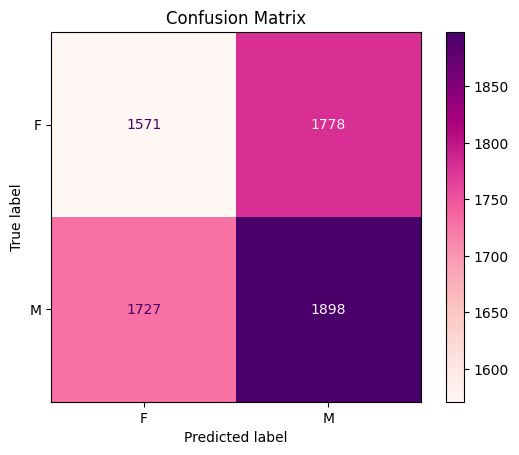

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred defined
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)


# Plot confusion matrix
disp.plot(cmap='RdPu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

### Confusion Matrix Summary
####
True Positive (TP): 1571 - model correctly predicted that these instances are Female.

False Positive (FP): 1778 - model incorrectly predicted that these instances are Female when they are actually Male.

False Negative (FN): 1727 - model incorrectly predicted that these instances are Male when they are actually Female.

True Negative (TN): 1898 - model correctly predicted that these instances are Male.

### Build a classification Report

In [81]:
from sklearn.metrics import classification_report

# Assuming you have y_test and y_pred defined
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.47      0.47      3349
           1       0.52      0.52      0.52      3625

    accuracy                           0.50      6974
   macro avg       0.50      0.50      0.50      6974
weighted avg       0.50      0.50      0.50      6974



### Summary:
#### 
The model has an overall accuracy of 50%, meaning it correctly predicts the gender for 50% of the instances.

Precision, recall, and F1-score are provided for each class (Female and Male).

Precision is about 48-52%, indicating the accuracy of positive predictions.

Recall is about 47-52%, indicating the ability to capture all positive instances.

F1-score balances precision and recall, providing a single metric.